## Exercise 9 - K-nearest neighbors

- Use the same dataset as in previous exercise (ex08) (can be downloaded [here](http://student.labranet.jamk.fi/~hantt/data/voice.csv))
- Dataset includes male and female voice samples with different features
- In this exercise you will use supervised machine learning method called K-nearest neighbors for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe.

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

df = pd.read_csv('voice.csv')
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


2 filter the data so that only the following columns will be selected: **meanfun** and **IQR**. Then split the dataset so that 75 % of the data will be used for training.

In [ ]:
df = df[['meanfun', 'IQR']]

X = df.values
y = df.index.values

split_idx = int(0.75 * len(X))

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
f

,meanfun,IQR
0,0.084279,0.075122
1,0.107937,0.073252
2,0.098706,0.123207
3,0.088965,0.111374
4,0.106398,0.127325
...,...,...
3163,0.182790,0.151859
3164,0.188980,0.162193
3165,0.209918,0.190936
3166,0.172375,0.176435


3 Find the optimal value for k comparing possible values and error rate.

In [13]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    error_rates.append(1 - knn.score(X_test, y_test))

optimal_k = np.argmin(error_rates) + 1
print(f"The optimal value for k is {optimal_k}")

The optimal value for k is 1


4 Define a function and include the following operations inside the function:
   - Define a classifier
   - Fit the data for the classifier
   - Calculate minimum and maximum values for boundaries for meanfun and IQR
   - Run predictions
   - Draw a chart from predicted data utilising previously defined colormaps

Utilise your function and call it using the optimal k value chosen previously.

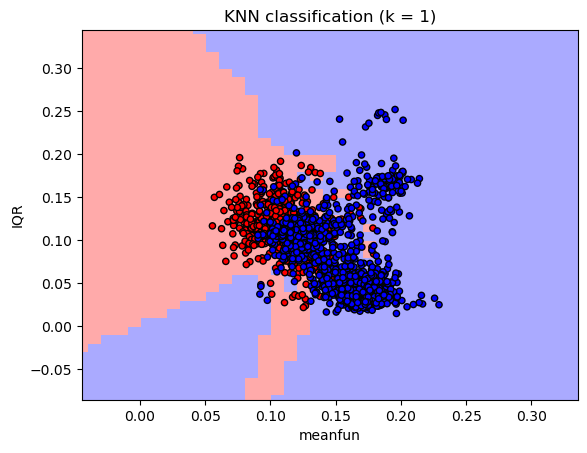

In [46]:
def classify_and_draw(k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"KNN classification (k = {k})")
    plt.xlabel("meanfun")
    plt.ylabel("IQR")
    plt.show()

classify_and_draw(optimal_k)